<h1> Laboratorio 8 PDS, Filtros FIR e IIR </h1>
<h2> José David González Henao 1152466837 </h2>
<h3> 1) Diseño de Filtros con Respuesta Finita al Impulso </h3>

In [3]:
import numpy as np
from matplotlib.pylab import *
#from scipy import *
import scipy.signal as signal
%matplotlib inline

fc1 = 1000.0
fc2 = 4000.0
fs = 16000.0 # frec de muestreo
Adb = 0 
N = 512 # Numero de puntos de la FFT
BW = 200 # Ancho de banda en la banda de transicion

wc1 = 2*np.pi*fc1/fs # frecuencia de corte 1 normalizada en radianes
wc2 = 2*np.pi*fc2/fs # frecuencia de corte 2 normalizada en radianes

bwn = 2*np.pi*BW/fs # ancho de banda  normalizado en radianes

M = int(4/bwn) # orden estimado del filtro
print('El orden del filtro es: ', M)

n = np.arange(-M,M)

h4 = (wc1/np.pi*np.sinc(wc1*(n)/np.pi)) - (wc2/np.pi*np.sinc(wc2*(n)/np.pi)) 
h4[n==0] = 1-(wc2-wc1)/np.pi

w4,Hh4 = signal.freqz(h4,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal


##Hamming
win= signal.hamming(len(n)) # funcion ventana para eliminar el fenomeno de Gibbs
h5=h4*win # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h5=h5*A # Ganancia del filtro
w5,Hh5 = signal.freqz(h5,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

u=np.ones_like(n) # escalon
un=np.convolve(u, h5, mode='full') # respuesta al escalon


El orden del filtro es:  50


<ipython-input-6-3d3a41be8823>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(n+M,h5,basefmt='b-')
<ipython-input-6-3d3a41be8823>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(un,basefmt='b-')


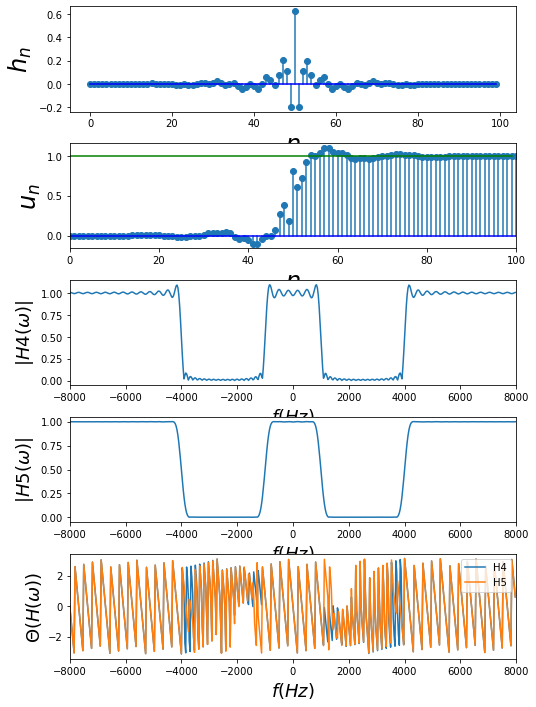

In [6]:
fig1,axs1 = subplots(5,1)
fig1.set_size_inches((8,12))
subplots_adjust(hspace=0.3)

ax=axs1[0]
ax.stem(n+M,h5,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_n$",fontsize=24)


ax=axs1[1]
ax.stem(un,basefmt='b-')
ax.plot(u, color='g')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$u_n$",fontsize=24)
ax.axis(xmax=M*2,xmin=0)

ax=axs1[2]
ax.plot((w4-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh4)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H4(\omega)| $",fontsize=18)

ax=axs1[3]
ax.plot((w5-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh5)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H5(\omega)| $",fontsize=18)

ax=axs1[4]
ax.plot((w4-np.pi)*fs/(2*np.pi),np.angle(np.fft.fftshift(Hh4)))
ax.plot((w5-np.pi)*fs/(2*np.pi),np.angle(np.fft.fftshift(Hh5)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$\Theta(H(\omega)) $",fontsize=18)
ax.legend(['H4', 'H5'])





<h2> Observaciones </h2>
<p> En la primera gráfica se puede observar la respuesta ideal del filtro, como se esperaba es muy parecido a la sinc, pero como es una combinación lineal de 2 sinc será un poco defromada. <br> En la segunda ya se puede observar con enventanado, hay una banda de transición allí así como Ripple. <br>. Se puede observar en la gráfica 4 que allí es sin aplicar la ventana de Hamming, sin truncar, y ya que el filtro tiene componentes finitas se observa el fenomeno de Gibbs, el ripple está presente alli <br>. En la cuarta gráfica se puede observar que al aplicar una ventana de Hamming se reduce a 0 el ripple, pero el ancho de banda de transición es mucho mayor, no tiene frecuencias de corte tan parecidas al filtro ideal.

<h2> 2. Filtrado de música con filtros FIR e IIR </h2>

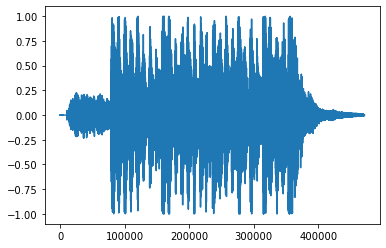

In [9]:
from IPython.display import Audio
from scipy.io.wavfile import read 
fs_a, audio=read('audio3.wav')
audio = audio - np.mean(audio)
audio = (audio/np.max(audio))
plt.plot(audio)
plt.show()
Audio(audio, rate=fs_a)


<p> Principalmente se logran escuchar campanillas e instrumentos de percusión pequeños con frecuencias altas, y lo que parece ser un sintetizaor </p>

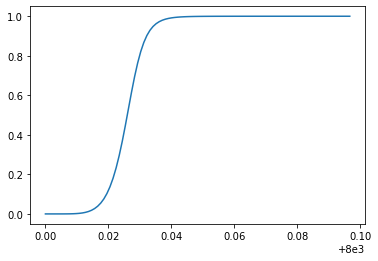

In [22]:
import scipy.signal as sp
fc = 200
wc = 2*np.pi*fc/fs_a
b, a = sp.butter(6, wc, btype="highpass")
wb, Hb = sp.freqz(b, a, 1024)
plt.plot(wb[0:100]/np.pi + (fs/2), np.abs(Hb[0:100]))

In [23]:
filtrado = sp.lfilter(b, a, audio)
filtrado = filtrado
Audio(filtrado, rate=fs_a)

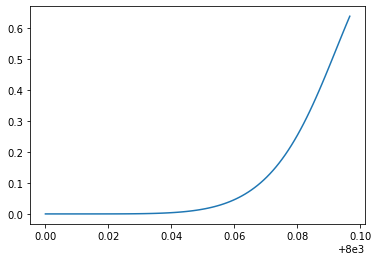

In [24]:
fc = 700
wc = 2*np.pi*fc/fs_a
b, a = sp.butter(6, wc, btype="highpass")
wb, Hb = sp.freqz(b, a, 1024)
plt.plot(wb[0:100]/np.pi + (fs/2), np.abs(Hb[0:100]))
filtrado = sp.lfilter(b, a, audio)
Audio(filtrado, rate=fs_a)

0.3419420575335829


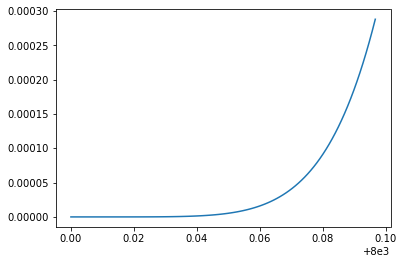

In [28]:
fc = 2400
wc = 2*np.pi*fc/fs_a
print(wc)
b, a = sp.butter(6, wc, btype="highpass")
wb, Hb = sp.freqz(b, a, 1024)
plt.plot(wb[0:100]/np.pi + (fs/2), np.abs(Hb[0:100]))
filtrado = sp.lfilter(b, a, audio)
Audio(filtrado, rate=fs_a)

<h2> Observaciones </h2> 
<p> Se cambió la última frecuencia de corte a 2400 Hz ya que la planteada superaba la frecuencia de muestreo del audio. <br> A medida que se aumentaba la frecuencia de corte se escuchaban menos los bajos del sintetizador y sólo se escuchaban las campanas, asi como también se volvía más artificial el sonido, ya que aunque hayan instrumentos que tengan la energía concentrada en un rango de fecuencia pequeño, como es el caso de las campanillas, también tienen armónicos más bajos que pueden quedar por debajo de la fecuencia de corte, haciendo que el sonido no sea tan "natural" </p>

In [43]:
tb = 100
M = 500
fc = 700
wc = 2*np.pi*fc/fs_a
h = sp.remez(M, [0, fc, fc+tb, fs_a/2], [1, 0], [1, 1], Hz=fs_a, maxiter=50)
h = np.ones(len(h)) - h
w, H = sp.freqz(h, 1, 1024)
y = sp.lfilter(h, 1, audio)
Audio(y, rate=fs_a)

<p> Si logra filtrar muchos instrumentos pero no igualemente nítodos como el IIR <p>

In [44]:
M = 1600
wc = 2*np.pi*fc/fs_a
h = sp.remez(M, [0, fc, fc+tb, fs_a/2], [1, 0], [1, 1], Hz=fs_a, maxiter=50)
h = np.ones(len(h)) - h
w, H = sp.freqz(h, 1, 1024)
y = sp.lfilter(h, 1, audio)
Audio(y, rate=fs_a)

<p> Se logra oír una mayor claridad de sonido, pero las frecuencias filtradas son muy parecidas, se escuchan más o menos los mismos instrumentos </p>

<h2> Conclusiones </h2>
Se puede comprobar que en definitiva hay un tradeoff entre el ripple y el roll-off, con el método de ventaneo que escojamos se va a ver comprometido una de las dos si se favorece la otra, ya que no tenemos infinitas componentes espectrales para reproducir al 100 la señal, y tener su respuesta ideal en frecuencia. <br> Al usar Hamming y Hanning se está mejorando el ripple, si queremos que las frecuencias no se distorsionen tanto, pero va a haber un mayor roll-off. <br> Se comprueba la linealidad de la fase de los filtros FIR. <br> Que aunque hay una correlación inversa entre roll off y ripple no se puede decir que tienen una relación linear entre ellos.<br> Se pueden obtener filtros rechazabandas a partir de un pasabandas negandolos, o haciendoles una inversión espectral. Este hecho anterior se usó también para el filtro pasa-altas, sacado de la inversión espectral del filtro pasa-bajas del ejemplo. <br> Los filtros IIR son más efectivos filtrando un rango de frecuencias en una señal de audio. Los filtros FIR son menos efectivos pero más naturales, debido a la banda de transición, también son más pesados computaionalmente y para obtener un resultado similar al de los IIR, en cuestiones de filtrado de frecuencias, se debe sacrificar complejidad computacional a costas de tener una señal con un filtrado más "natural" al oído humano. <br> Los instrumentos en el audio 3 en su mayotía tienen una frecuencia muy alta. Son sonidos que percibimos como muy agudos. 